# Análisis de Regresión sobre el Dataset de Boston



In [2]:
#ignorar warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


# 1. Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### 2. Cargar los Datos Limpios

In [3]:
df = pd.read_csv('../csv/boston_eda_final.csv')

### 3. Preparar los Datos para el Modelo



In [4]:
X = df.drop('MEDV', axis=1)
Y = df['MEDV']

### 4. Dividir los Datos en Conjuntos de Entrenamiento y Prueba (Train/Test)



In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### 5. Entrenamiento y Evaluación de Modelos



In [6]:
def entrenar_evaluar_y_graficar(modelo, X_train, Y_train, X_test, Y_test):
    """
    Entrena un modelo de regresión, calcula métricas de evaluación y grafica
    los valores reales vs. los predichos.
    """
    nombre_modelo = modelo.__class__.__name__
    
    # Entrenar el modelo
    modelo.fit(X_train, Y_train)
    
    # Realizar predicciones
    Y_pred = modelo.predict(X_test)
    
    # Evaluar con métricas
    rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
    mae = mean_absolute_error(Y_test, Y_pred)
    r2 = r2_score(Y_test, Y_pred)
    
    print(f"--- Métricas para {nombre_modelo} ---")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R²: {r2:.4f}")
    
    # Graficar Y_true vs Y_pred
    plt.figure(figsize=(8, 6))
    plt.scatter(Y_test, Y_pred, alpha=0.6, edgecolors='w', s=50)
    plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=2)
    plt.xlabel('Valores Reales (Y_true)')
    plt.ylabel('Predicciones (Y_pred)')
    plt.title(f'Valores Reales vs. Predicciones - {nombre_modelo}')
    plt.grid(True)
    plt.show()
    
    return {'modelo': nombre_modelo, 'RMSE': rmse, 'MAE': mae, 'R2': r2}

#### 5.1 Regresión Lineal

--- Métricas para LinearRegression ---
RMSE: 0.3975
MAE: 0.1455
R²: 0.9969


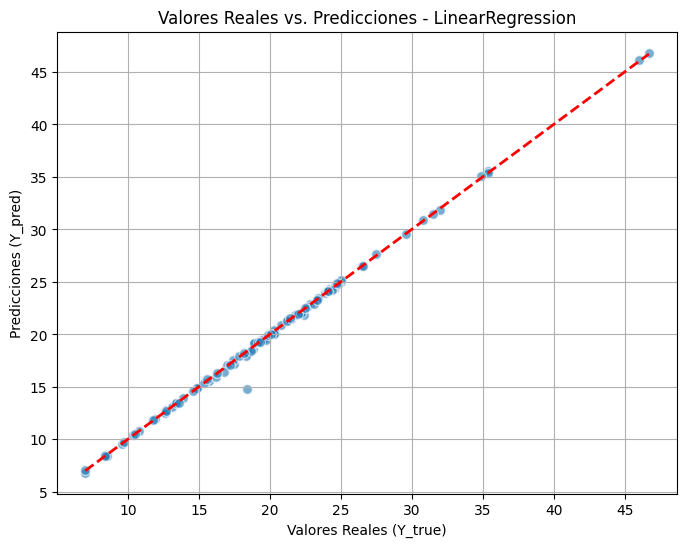

In [7]:
lr = LinearRegression()
resultados_lr = entrenar_evaluar_y_graficar(lr, X_train, Y_train, X_test, Y_test)

#### 5.2 Árbol de Regresión

--- Métricas para DecisionTreeRegressor ---
RMSE: 0.9844
MAE: 0.2908
R²: 0.9810


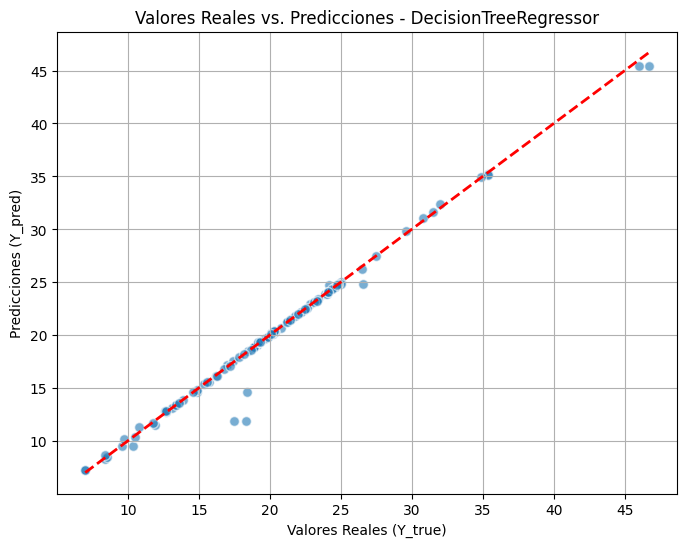

In [8]:
dtr = DecisionTreeRegressor(random_state=42)
resultados_dtr = entrenar_evaluar_y_graficar(dtr, X_train, Y_train, X_test, Y_test)

#### 5.3 Random Forest Regressor

--- Métricas para RandomForestRegressor ---
RMSE: 0.5344
MAE: 0.1934
R²: 0.9944


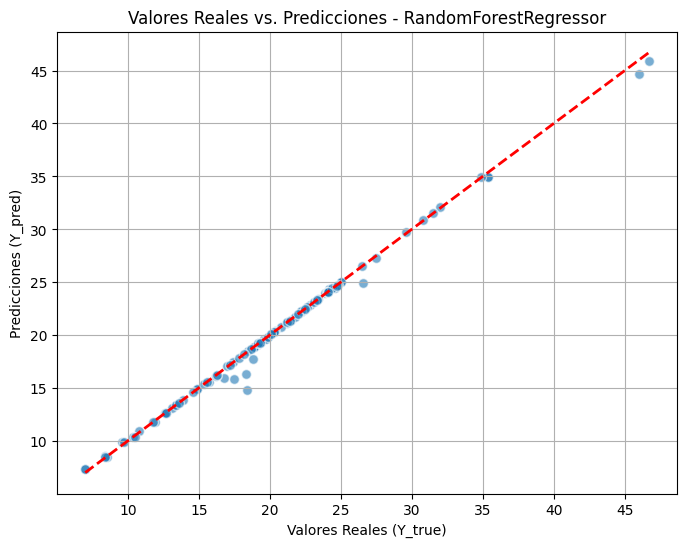

In [9]:
rfr = RandomForestRegressor(random_state=42, n_estimators=100)
resultados_rfr = entrenar_evaluar_y_graficar(rfr, X_train, Y_train, X_test, Y_test)

### 6. Comparación de Modelos



In [10]:
resultados = [resultados_lr, resultados_dtr, resultados_rfr]
df_resultados = pd.DataFrame(resultados)

print("--- Tabla Comparativa de Métricas ---")
print(df_resultados.to_string(index=False))

--- Tabla Comparativa de Métricas ---
               modelo     RMSE      MAE       R2
     LinearRegression 0.397536 0.145486 0.996906
DecisionTreeRegressor 0.984419 0.290816 0.981030
RandomForestRegressor 0.534418 0.193367 0.994409
